## Steps of Analysis
- Read and visualize the data
- Data Cleaning
- Preparation of data for modelling
- Scaling the Data
- PCA (Principal Component Analysis)
- Outlier Treatment
- Hopkins Statistic Test
- Building Model
- Closing Statement

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# To perform KMeans clustering 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score

# Read and Understand the data

In [2]:
country_data = pd.read_csv("Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_data.shape

(167, 10)

In [4]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


# Data Cleaning
- Identifying Missing data
- Identifying wrong data type
- Removing duplicates

In [6]:
#Identifying Missing data
total_null = country_data.isnull().sum().sort_values(ascending = False)
percent = ((country_data.isnull().sum()/country_data.isnull().count())*100).sort_values(ascending = False)
print("Total records (country_data Data) = ", country_data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(5)


Total records (country_data Data) =  167


,Total Missing,In Percent
gdpp,0,0.0
total_fer,0,0.0
life_expec,0,0.0
inflation,0,0.0
income,0,0.0


## Inference
- None of the columns have null values hence no drop required.



In [7]:
country_data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

## Inference
- None of the columns have inconsistent datatype, hence no conversion is required.

# Data Preparation
 - Derived Metrices
 - Exploratary Data analysis
        Visualize the data (Undertanding top or bottom 10 countries) on various factors
 - Correlation between different variables. How they co-related
 - Scaling the Data
 - PCA (Principal Component Analysis) on the data to remove redundancies.

In [8]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Derived Metrices

- The variables export, health & imports are percentage values and hence wouldn't give the clear picture of spending by the country. For example two countries (Afghanistan & Albina) have similar import % but not necessarily have the same gdpp which doesn't give accurate of idea of country being develop or under develop. Hence we need to derive the actual value of this variable.

In [9]:
# Converting exports,imports & health spending percentages to absolute values.
country_data['exports'] = country_data['exports'] * country_data['gdpp']/100
country_data['imports'] = country_data['imports'] * country_data['gdpp']/100
country_data['health'] = country_data['health'] * country_data['gdpp']/100

country_data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840


## Exploratory Data Analytics

- With the new derived variables let's visualise the top/bottom countries on different socio-economic and health factors

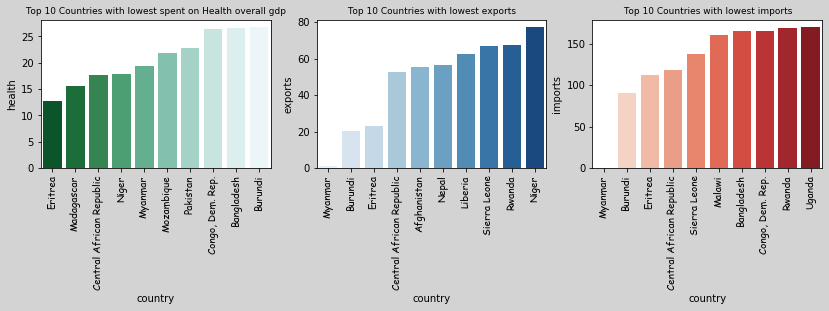

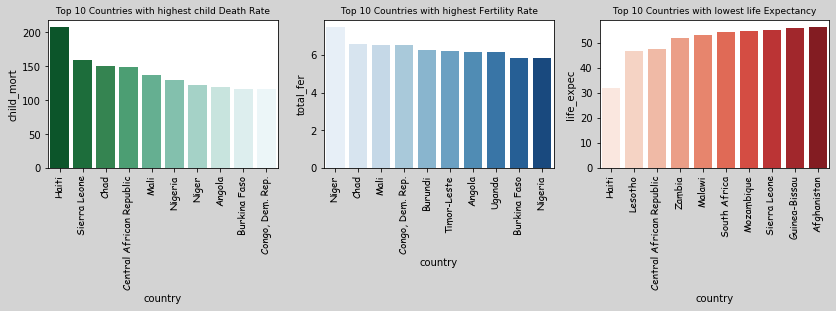

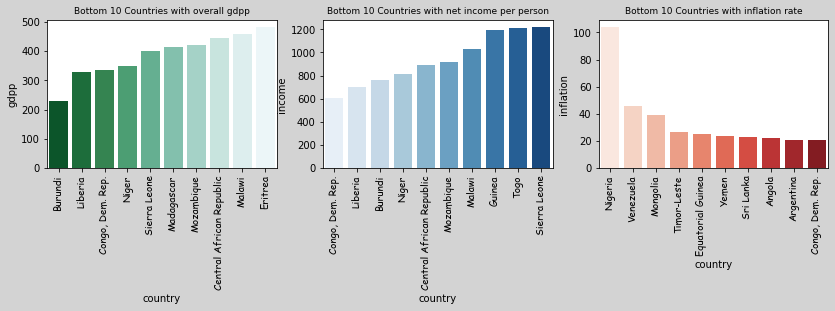

In [10]:
fig = plt.figure(figsize=(14,6))
fig.set_facecolor("lightgrey")

plt.subplot(2,3,1)
# Health :Total health spending as %age of Total GDP.
bottom10_health = country_data[['country','health']].sort_values('health', ascending = True).head(10)
sns.barplot(x='country',y='health',data=bottom10_health,palette="BuGn_r")
plt.title("Top 10 Countries with lowest spent on Health overall gdp",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.subplot(2,3,2)
bottom10_export = country_data[['country','exports']].sort_values('exports', ascending = True).head(10)
sns.barplot(x='country',y='exports',data=bottom10_export,palette="Blues")
plt.title("Top 10 Countries with lowest exports",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.subplot(2,3,3)
bottom10_import = country_data[['country','imports']].sort_values('imports', ascending = True).head(10)
sns.barplot(x='country',y='imports',data=bottom10_import,palette="Reds")
plt.title("Top 10 Countries with lowest imports",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")


fig = plt.figure(figsize=(14,6))
fig.set_facecolor("lightgrey")

plt.subplot(2,3,1)
# Child Death Rate : Death of children under 5 years of age per 1000 live births
top10_deathrate = country_data[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
sns.barplot(x='country',y='child_mort',data=top10_deathrate,palette="BuGn_r")
plt.title("Top 10 Countries with highest child Death Rate",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family="Comic Sans MS")

plt.subplot(2,3,2)
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_tot_fer = country_data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
sns.barplot(x='country',y='total_fer',data=top10_tot_fer,palette="Blues")
plt.title("Top 10 Countries with highest Fertility Rate",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.subplot(2,3,3)
top10_lowest_life_expec = country_data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
sns.barplot(x='country',y='life_expec',data=top10_lowest_life_expec,palette="Reds")
plt.title("Top 10 Countries with lowest life Expectancy",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

fig = plt.figure(figsize=(14,6))
fig.set_facecolor("lightgrey")

plt.subplot(2,3,1)
# The GDP per capita : Calculated as the Total GDP divided by the total population.
bottom10_gdpp = country_data[['country','gdpp']].sort_values('gdpp',ascending=True).head(10)
sns.barplot(x='country',y='gdpp',data=bottom10_gdpp,palette="BuGn_r")
plt.title("Bottom 10 Countries with overall gdpp",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family="Comic Sans MS")

plt.subplot(2,3,2)
# Per capita Income : Net income per person
bottom10_net_income = country_data[['country','income']].sort_values('income', ascending = True).head(10)
sns.barplot(x='country',y='income',data=bottom10_net_income,palette="Blues")
plt.title("Bottom 10 Countries with net income per person",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

# Inflation: The measurement of the annual growth rate of the Total GDP
plt.subplot(2,3,3)
bottom10_inflation = country_data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
sns.barplot(x='country',y='inflation',data=bottom10_inflation,palette="Reds")
plt.title("Bottom 10 Countries with inflation rate",fontsize=9)
plt.xticks(rotation = 90,fontsize=10,family = "Comic Sans MS")

plt.show()


## Correlation coefficients
- We have a lot of variables, creating and visualising proper clusters will be a difficulty.Let's see if we can apply PCA to do dimensional reduction first let's plot the correlation matrix and check if the data is indeed highly correlated so that the usage of PCA in this scenario is justified

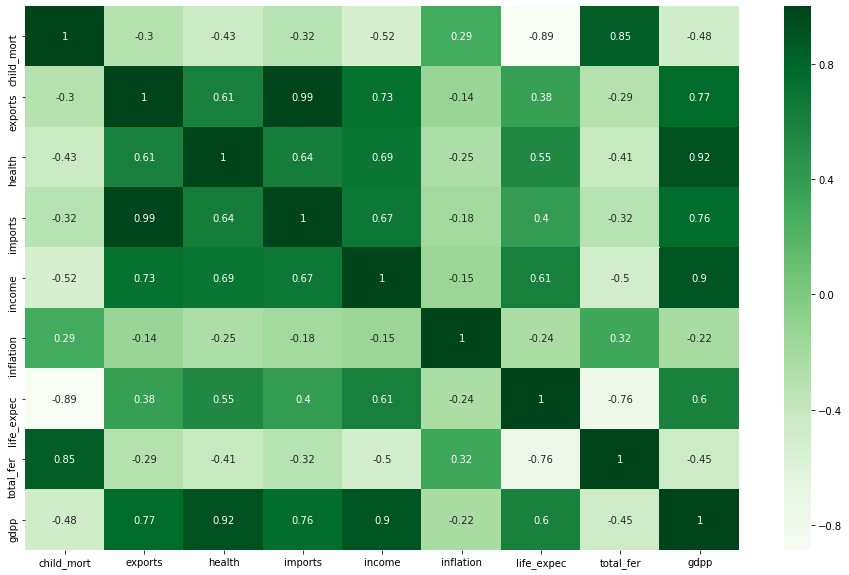

In [11]:
# Correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(country_data.corr(),annot=True,cmap="Greens")
plt.show()

## Inference
- child_mortality and life_expentency are highly correlated with correlation of -0.89
- child_mortality and total_fertility are highly correlated with correlation of 0.85
- imports and exports are highly correlated with correlation of 0.74
- life_expentency and total_fertility are highly correlated with correlation of -0.76



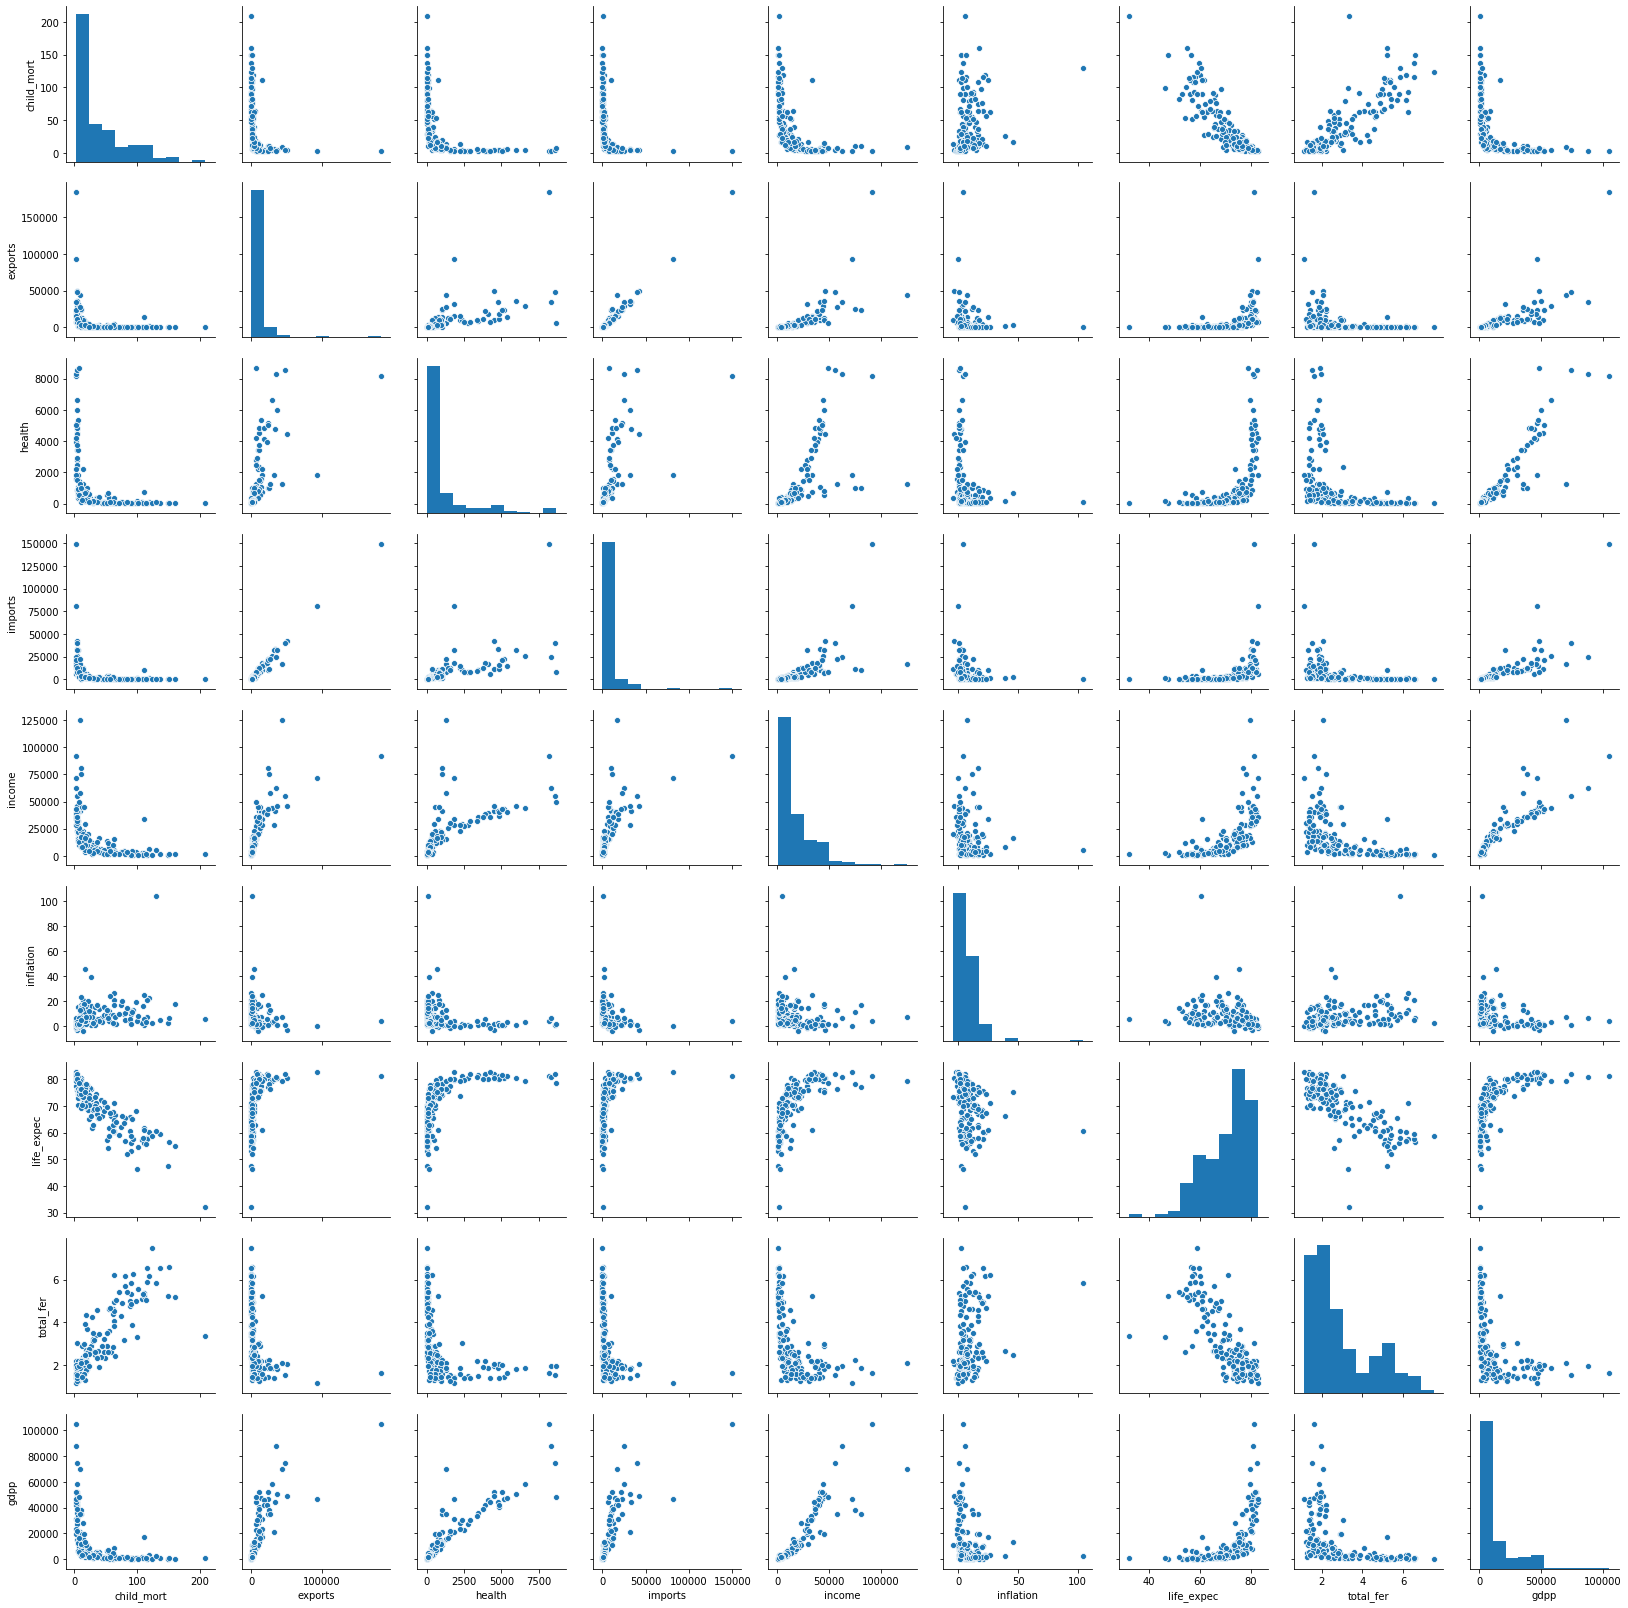

In [12]:
# Pairplot of all numeric columns
sns.pairplot(country_data)

## Inferences
- A lot of highly correlated variables exist, hence the usage of PCA is justified. Now let's proceed to doing it on the dataset

In [13]:
country_data_tmp = country_data.copy()
country_data_tmp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Rescaling the features

- Most software packages use SVD to compute the principal components and assume that the data is scaled and centred, so it is important to do standardisation/normalisation.

In [14]:
# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
col_list = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Scale these variables using 'fit_transform'
country_data_tmp[col_list] = scaler.fit_transform(country_data_tmp[col_list])

country_data_tmp.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Separate out the Feature variable and response variable

In [15]:
# Putting feature variable to x
x = country_data_tmp.drop(['country'],axis=1)

# Putting response variable to country
country = country_data_tmp['country']

In [16]:
x.shape
x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [17]:
country.shape
country.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

## Applying PCA on data

### PCA
- Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques to improve model performance

In [18]:
pca = PCA(svd_solver='randomized',random_state=42)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [20]:
# Variance Ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0.5, 1.0, 'Variance Ratio for each PCA component')

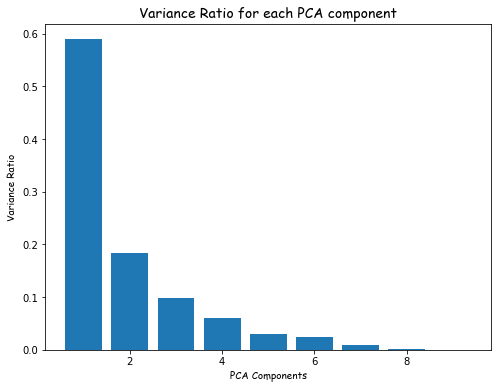

In [21]:
# Variance Ratio bar plot for each PCA components.
fig = plt.figure(figsize = (8,6))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontsize=10,family = "Comic Sans MS")
plt.ylabel("Variance Ratio",fontsize=10,family = "Comic Sans MS")
plt.title("Variance Ratio for each PCA component",fontsize=14,family = "Comic Sans MS")

## Inference
- With first component variance explained is almost 60%.
- For second component variance explained is almost 20%.
- For third component variance explained is around 10%



## Making Scree plot

Text(0.5, 1.0, 'Sree plot to Visualize Cumulative Variance')

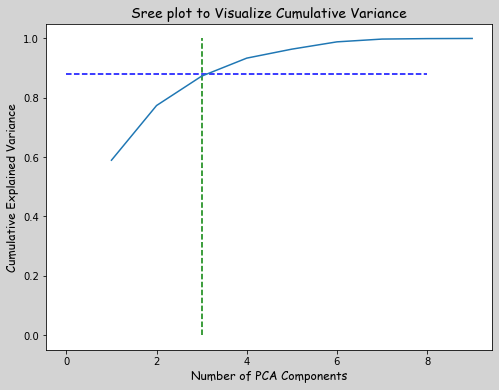

In [22]:
fig = plt.figure(figsize = (8,6))
fig.set_facecolor("lightgrey")
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.vlines(x=3,ymax=1,ymin=0.0,color="g",linestyles="--")
plt.hlines(y=0.88,xmax=8,xmin=0.0,color="b",linestyles="--")

plt.xlabel('Number of PCA Components',fontsize=12,family = "Comic Sans MS")
plt.ylabel('Cumulative Explained Variance',fontsize=12,family = "Comic Sans MS")
plt.title("Sree plot to Visualize Cumulative Variance",fontsize=14,family = "Comic Sans MS")

## Inference

- From the above it is clear that first 3 principal components can well explain around 90% varaiance. Hence we will use them clustering process.

In [23]:
# Checking which attributes are well explained by the pca components
colnames = list(x.columns)
pca_attr = pd.DataFrame({'Attribute':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pca_attr

,Attribute,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


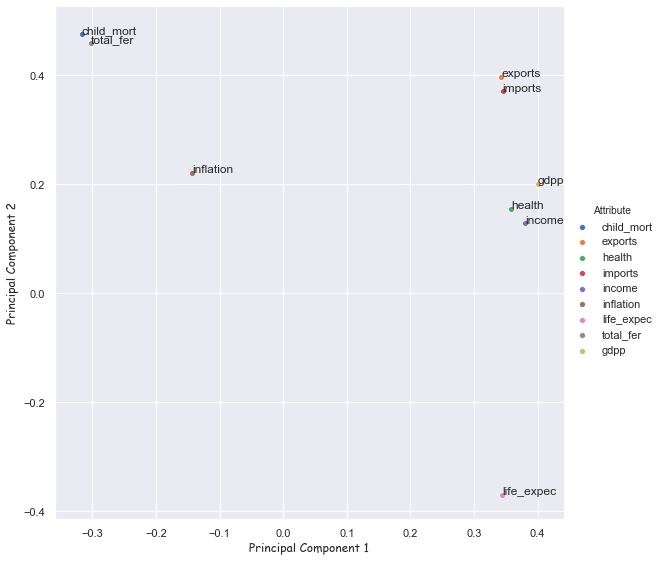

In [24]:
# Plotting the above dataframe for better visualization with PC1 and PC2
sns.set(style='darkgrid')
sns.pairplot(data=pca_attr, x_vars=["PC1"], y_vars=["PC2"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontsize=12,family = "Comic Sans MS")
plt.ylabel("Principal Component 2",fontsize=12,family = "Comic Sans MS")

for i,txt in enumerate(pca_attr.Attribute):
    plt.annotate(txt, (pca_attr.PC1[i],pca_attr.PC2[i]))

## Inference
- life expectency, income, gdpp and health are very well explained by PC1.
- imports and exports are well explained by both the components PC1 and PC2.
- child mortality,inflation and total fertility are well explained by PC2.


In [25]:
# Building the dataframe using Incremental PCA for better efficiency.
inc_pca = IncrementalPCA(n_components=3)

In [26]:
pca_final = inc_pca.fit_transform(x)
pca_final.shape

(167, 3)

In [27]:
pca_final = pd.DataFrame(pca_final, columns=["PC1", "PC2","PC3"])
df = pd.concat([country, pca_final], axis=1)
df.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


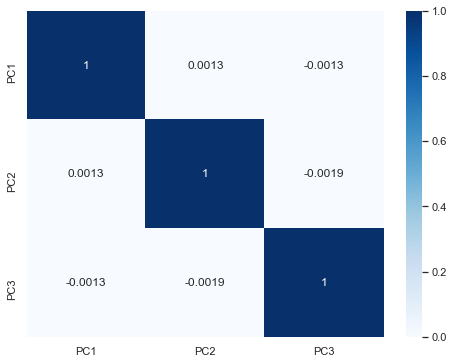

In [28]:
# Plotting Heatmap to check is there still dependency in the dataset.

plt.figure(figsize = (8,6))        
ax = sns.heatmap(df.corr(),annot = True,cmap="Blues")


## Inference:

From above heatmap  - Correlation among the attributes is almost 0, we can proceed with this dataframe

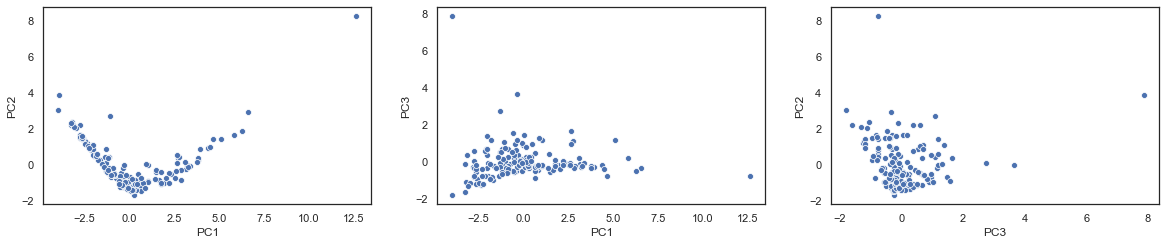

In [29]:
sns.set(style='white')
fig.set_facecolor("lightgrey")

plt.figure(figsize=(20, 8))
plt.subplot(2,3,1)
sns.scatterplot(data=df, x='PC1', y='PC2')
plt.subplot(2,3,2)
sns.scatterplot(data=df, x='PC1', y='PC3')
plt.subplot(2,3,3)
sns.scatterplot(data=df, x='PC3', y='PC2')



## Outlier Analysis and Treatment

In [30]:
#Function to plot a list of categorical variables together
def box_plot(colname):
    plt.figure(figsize=(15, 4))
    for var in colname:
        plt.subplot(1,3,colname.index(var)+1)
        sns.boxplot(x = var, data = df)
        plt.xlabel(var, fontsize=12,family = "Comic Sans MS")
    plt.show()

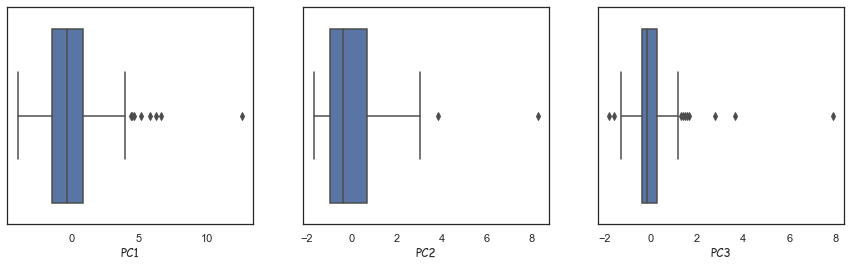

In [31]:
colnames = ['PC1', 'PC2', 'PC3']
box_plot(colnames[:])

In [32]:
# Statstical Outlier treatment for PC1

Q1 = df.PC1.quantile(0.05)
Q3 = df.PC1.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.PC1 >= Q1) & (df.PC1 <= Q3)]

# Statstical Outlier treatment for PC2

Q1 = df.PC2.quantile(0.05)
Q3 = df.PC2.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.PC2 >= Q1) & (df.PC2 <= Q3)]

# Statstical Outlier treatment for PC3
Q1 = df.PC3.quantile(0.05)
Q3 = df.PC3.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.PC3 >= Q1) & (df.PC3 <= Q3)]


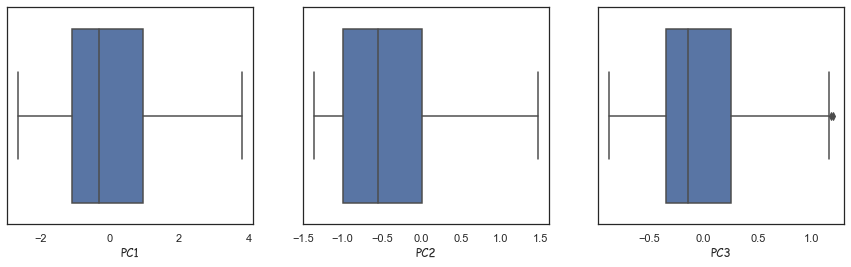

In [33]:
colnames = ['PC1', 'PC2', 'PC3']
box_plot(colnames[:])

In [34]:
# Reindexing the df after outlier removal
df = df.reset_index(drop=True)
df_final = df.drop(['country'],axis=1)
df.head()
df_final.shape

(119, 3)

## Hopkins Statistics Test

- A way of measuring the cluster tendency of a data set.
- A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0

In [35]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [36]:
#Let's check the Hopkins measure
hopkins(df_final)

0.7500247312092572


## Inference

- 0.75 is a good Hopkins score for Clustering.


## Building Model

- K Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

### Finding the Optimal Number of Clusters

Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.


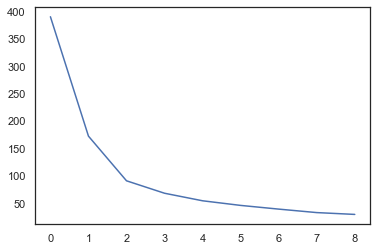

In [37]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_final)
    ssd.append(kmeans.inertia_)

plt.plot(ssd)


## Inference

Looking at the above elbow curve it looks good to proceed with either 4 or 5 clusters.


## Silhouette Analysis

In [38]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_final)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4873400103541441
For n_clusters=3, the silhouette score is 0.46397714562182474
For n_clusters=4, the silhouette score is 0.3987356568367148
For n_clusters=5, the silhouette score is 0.3617098033392007
For n_clusters=6, the silhouette score is 0.3660371654430613
For n_clusters=7, the silhouette score is 0.3703642483431638
For n_clusters=8, the silhouette score is 0.37523701546018884


In [39]:
#K-means with k=4 clusters

cluster5 = KMeans(n_clusters=5, max_iter=50, random_state= 100)
cluster5.fit(df_final)

# Cluster labels
cluster5.labels_

array([0, 4, 1, 4, 2, 2, 4, 1, 1, 3, 1, 4, 3, 3, 3, 0, 4, 4, 3, 2, 3, 4,
       4, 4, 0, 0, 1, 2, 1, 4, 4, 3, 4, 0, 1, 3, 2, 2, 0, 0, 4, 2, 0, 1,
       4, 3, 3, 1, 2, 3, 3, 4, 0, 1, 2, 4, 2, 4, 4, 0, 2, 3, 0, 1, 0, 4,
       1, 0, 4, 4, 2, 0, 4, 3, 4, 3, 3, 0, 3, 2, 1, 0, 4, 4, 4, 3, 1, 1,
       4, 4, 0, 3, 1, 1, 1, 0, 0, 1, 1, 4, 0, 4, 2, 3, 0, 3, 4, 4, 3, 0,
       4, 2, 2, 2, 4, 3, 3, 4, 0])

In [40]:
# Assign the label
df['Cluster_Id'] = cluster5.labels_
df.head()

,country,PC1,PC2,PC3,Cluster_Id
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,4
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1
3,Armenia,-0.332692,-1.274517,0.176636,4
4,Australia,3.180362,-0.250785,-0.116877,2


In [41]:
# Number of countries in each cluster
df['Cluster_Id'].value_counts()

4    35
3    24
0    23
1    20
2    17
Name: Cluster_Id, dtype: int64


## Inference:

- It seems there are good number of countries in each clusters.


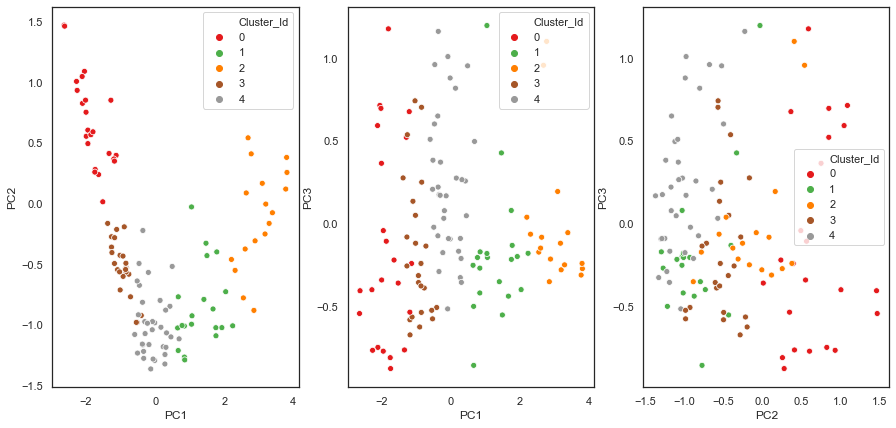

In [42]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,3, figsize=(15,7))

sns.scatterplot(x='PC1',y='PC2',hue='Cluster_Id',legend='full',palette="Set1",data=df,ax=axes[0])
sns.scatterplot(x='PC1',y='PC3',hue='Cluster_Id',legend='full',palette="Set1",data=df,ax=axes[1])
sns.scatterplot(x='PC2',y='PC3',hue='Cluster_Id',legend='full',palette="Set1",data=df,ax=axes[2])


## Inference:

- We have visualized the data on the principal components and saw some good clusters were formed but some were not so good hence let's now visualize the data on the original attributes.


In [43]:
# Merging the df with PCA with original df

df_merge = pd.merge(country_data,df,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

# Creating df with mean values
cluster_child = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).gdpp.mean())

df_concat = pd.concat([pd.Series([0,1,2,3,4]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,68.478261,884.774513,838.634174,135.873852,4650.869565,10.711304,62.169565,4.507391,2152.739130
1,1,7.140000,9374.470000,9371.095000,1442.029000,26050.000000,1.639550,76.915000,1.740000,18835.000000
2,2,5.141176,16736.111765,15324.935294,3954.500588,41705.882353,2.823647,80.476471,1.776471,40911.764706
3,3,37.887500,896.553272,1187.512546,123.454850,5275.000000,6.525875,68.958333,2.953750,2364.250000
4,4,18.168571,2622.824286,2635.567714,411.125114,13102.000000,8.053429,74.045714,2.107143,6497.142857


## Inferences
- From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. We have also cross checked with Principal components and found that these variables have good score in PCA. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

In [44]:
df_merge_col.head(5)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,4
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,1
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,4
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,2


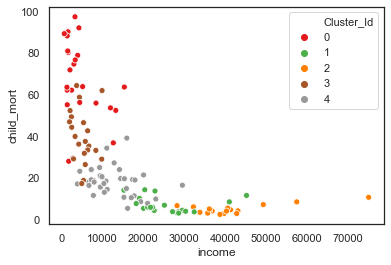

In [45]:
figsize=(15,12)
sns.scatterplot(x='income',y='child_mort',hue='Cluster_Id',data = df_merge_col,legend='full',palette="Set1")

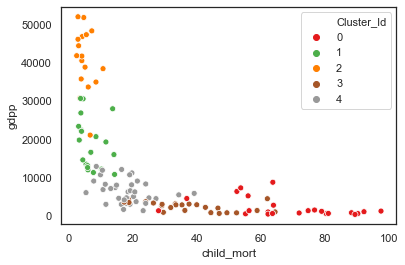

In [46]:
figsize=(15,12)
sns.scatterplot(x='child_mort',y='gdpp',hue='Cluster_Id',data=df_merge_col,legend='full',palette="Set1")

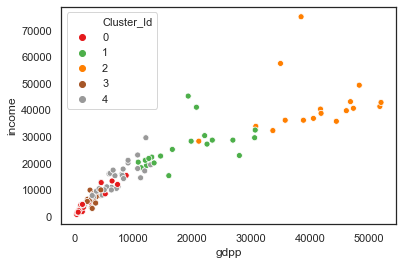

In [47]:
figsize=(15,12)
sns.scatterplot(x='gdpp',y='income',hue='Cluster_Id',data=df_merge_col,legend='full',palette="Set1")

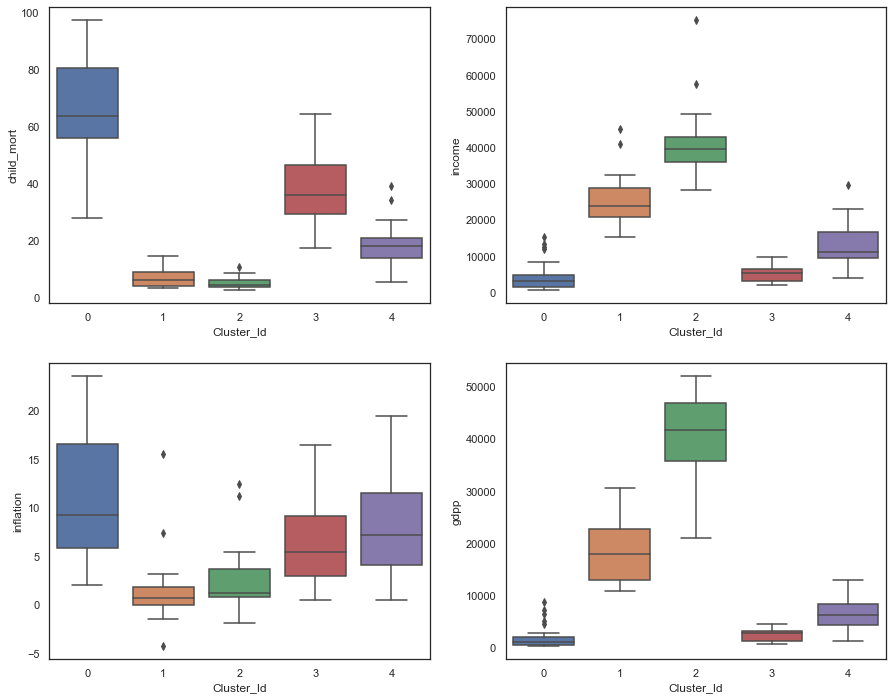

In [48]:
# Box plot on Original attributes to visualize the spread of the data
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = df_merge_col,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'income', data = df_merge_col,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=df_merge_col,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=df_merge_col,ax=axes[1][1])



## Inference:

- Child Mortality is highest for Cluster 0 and Cluster 3.These clusters need some aid.
- Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0 and 3. Hence, these countries need some help.



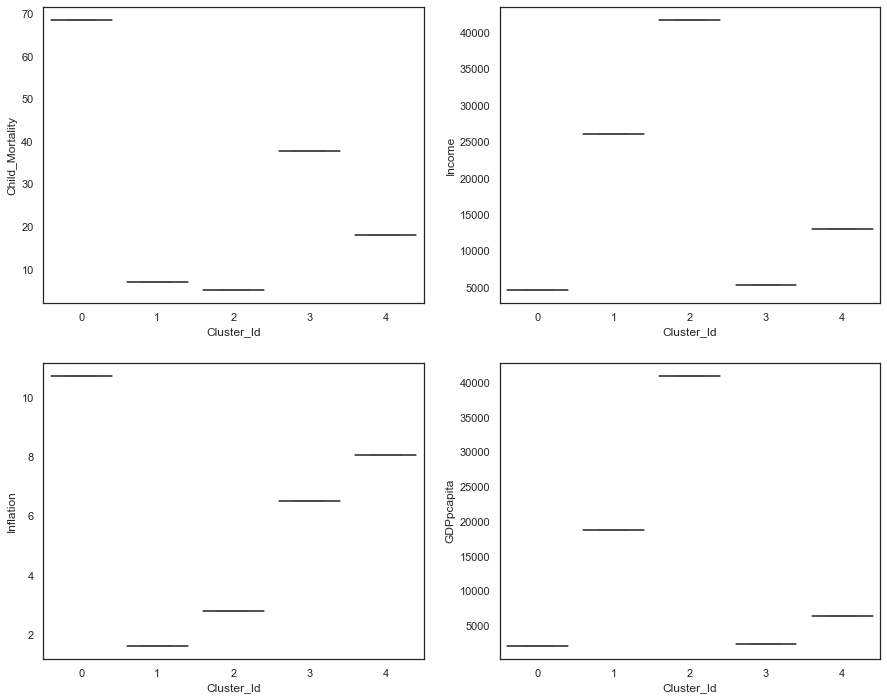

In [49]:
# Box plot to visualise the mean value of few original attributes.

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'Child_Mortality', data = df_concat,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'Income', data = df_concat,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'Inflation', data=df_concat,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'GDPpcapita', data=df_concat,ax=axes[1][1])

## Inferences
 - Mean values also suggests same trends as above.

In [50]:
# List of countries in Cluster 0
df_merge_col[df_merge_col['Cluster_Id']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,0
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,0
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,0
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
38,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,0
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,0
42,Ghana,74.7,386.4500,601.290,68.3820,3060,16.60,62.2,4.27,1310,0
52,Iraq,36.9,1773.0000,1534.500,378.4500,12700,16.60,67.2,4.56,4500,0
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,0


In [51]:
# List of countries in Cluster 3
df_merge_col[df_merge_col['Cluster_Id']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
9,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,3
12,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,3
13,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,3
14,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,3
18,Cambodia,44.4,425.22600,467.670000,44.6448,2520,3.120,66.1,2.88,786,3
20,Cape Verde,26.5,1082.37000,2045.580000,135.3790,5830,0.505,72.5,2.67,3310,3
31,Egypt,29.1,553.80000,691.600000,121.1600,9860,10.100,70.5,3.19,2600,3
35,Fiji,24.1,2109.70000,2332.350000,177.3900,7350,4.230,65.3,2.67,3650,3
45,Guatemala,35.4,730.14000,1027.290000,193.8550,6710,5.140,71.3,3.38,2830,3
46,Guyana,37.6,1562.56000,2404.640000,163.5520,5840,5.730,65.5,2.65,3040,3


## Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

- Divisive
- Agglomerative.



In [52]:
df_final.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.457626,-0.673301,0.961867
2,0.649849,-1.024374,-0.250103
3,-0.332692,-1.274517,0.176636
4,3.180362,-0.250785,-0.116877


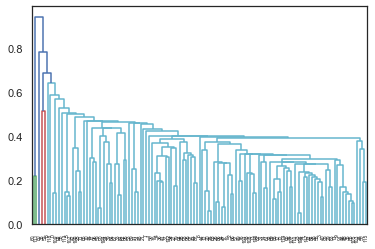

In [53]:
# Single linkage
single_link = linkage(df_final, method='single',metric='euclidean')
dendrogram(single_link)
plt.show()

## Inference 
- No Good results. Let's try Complete linkage Method.

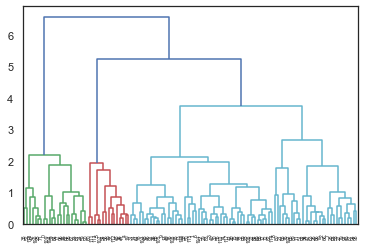

In [54]:
# Complete Linkage

complete_link = linkage(df_final, method='complete',metric='euclidean')
dendrogram(complete_link)
plt.show()

In [55]:
df_hc = df.copy()
df_hc = df_hc.drop('Cluster_Id',axis=1)
df_hc.head()


,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Algeria,-0.457626,-0.673301,0.961867
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103
3,Armenia,-0.332692,-1.274517,0.176636
4,Australia,3.180362,-0.250785,-0.116877


In [56]:
# Let cut the tree at height of approx 3 to get 4 clusters &
# see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(complete_link, n_clusters = 4).reshape(-1,))
df_hc_cut = pd.concat([df_hc, clusterCut], axis=1)
df_hc_cut.columns = ['country', 'PC1', 'PC2','PC3','Cluster_Id']
df_hc_cut.head()

,country,PC1,PC2,PC3,Cluster_Id
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,3


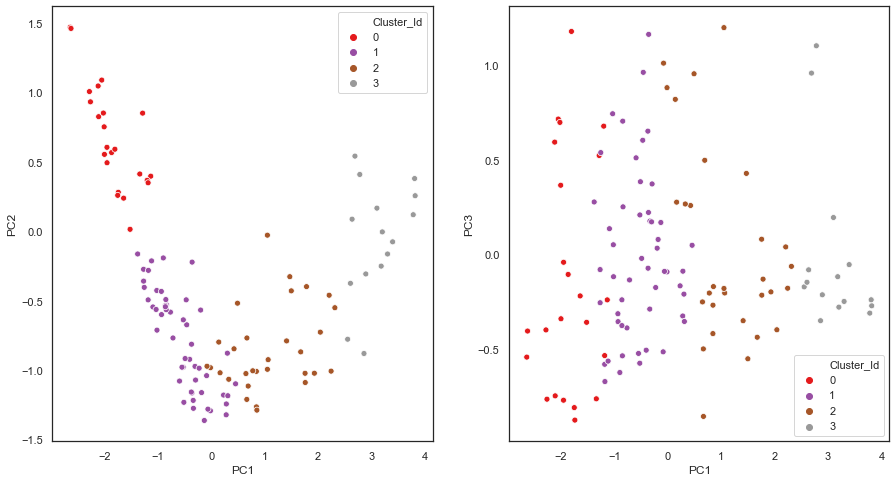

In [57]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='PC1',y='PC2',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc_cut,ax=axes[0])
sns.scatterplot(x='PC1',y='PC3',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc_cut,ax=axes[1])

In [58]:
# Merging the df with PCA with original df

df_merge_hc=pd.merge(country_data,df_hc_cut,on='country')
df_merge_hc_col=df_merge_hc[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]
df_merge_hc_col.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,2
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,1
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,3


In [59]:
df_merge_hc_col['Cluster_Id'].value_counts()

1    51
2    30
0    23
3    15
Name: Cluster_Id, dtype: int64

## Inference
- The no. of Countries in Cluster =0 using Hierarihical clustering is same as the no. of countries for Cluster = 0 in K-Means clustering.

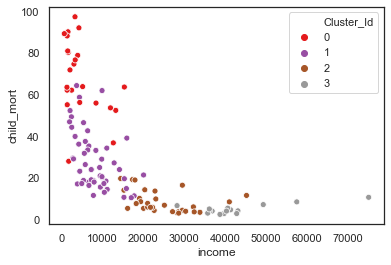

In [60]:
figsize=(15,12)
sns.scatterplot(x='income',y='child_mort',hue='Cluster_Id',data = df_merge_hc_col,legend='full',palette="Set1")

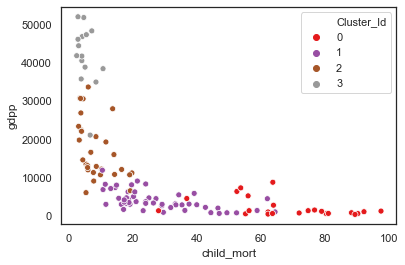

In [61]:
figsize=(15,12)
sns.scatterplot(x='child_mort',y='gdpp',hue='Cluster_Id',data=df_merge_hc_col,legend='full',palette="Set1")

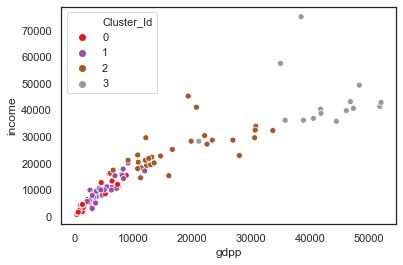

In [62]:
figsize=(15,12)
sns.scatterplot(x='gdpp',y='income',hue='Cluster_Id',data=df_merge_hc_col,legend='full',palette="Set1")

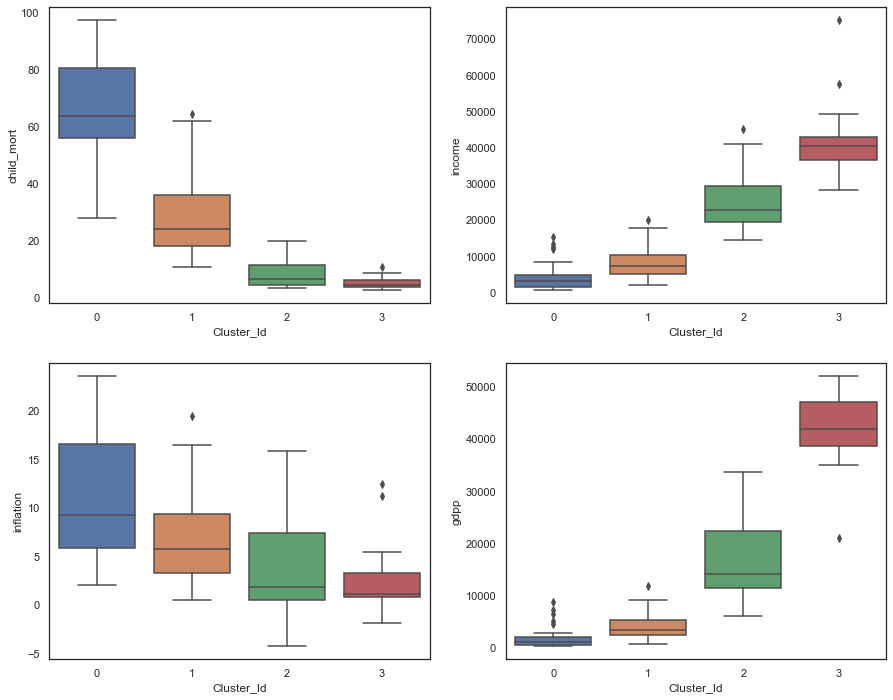

In [63]:
# Box plot on Original attributes to visualize the spread of the data
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = df_merge_hc_col,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'income', data = df_merge_hc_col,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=df_merge_hc_col,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=df_merge_hc_col,ax=axes[1][1])


## Inference
- We have analyzed both K-means and Hierarchial clustering and found clusters formed are identical. The clusters formed in both the cases are not that great but gives some idea about countries which need of aid.

In [64]:
# List of countries in Cluster 0
df_merge_hc_col[df_merge_hc_col['Cluster_Id']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,0
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,0
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,0
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
38,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,0
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,0
42,Ghana,74.7,386.4500,601.290,68.3820,3060,16.60,62.2,4.27,1310,0
52,Iraq,36.9,1773.0000,1534.500,378.4500,12700,16.60,67.2,4.56,4500,0
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,0


## Inference 
 - The country list for cluster =0 using Hierarchical and K-Means are same. 

In [65]:
country_list = df_merge_hc_col[df_merge_hc_col['Cluster_Id']==0]
country_list.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,0
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,0
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,0
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0


In [66]:
country_list['country']

0          Afghanistan
15            Botswana
24             Comoros
25         Congo, Rep.
33             Eritrea
38               Gabon
39              Gambia
42               Ghana
52                Iraq
59               Kenya
62                 Lao
64             Liberia
67          Madagascar
71          Mauritania
77             Namibia
81            Pakistan
90              Rwanda
95     Solomon Islands
96        South Africa
100              Sudan
104           Tanzania
109             Uganda
118              Yemen
Name: country, dtype: object

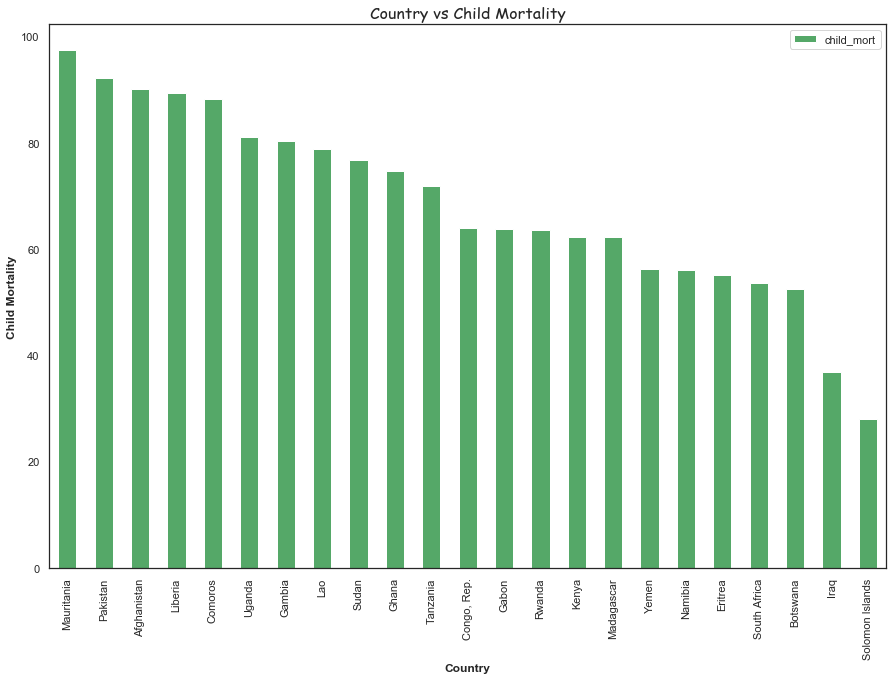

In [67]:
country_childmort = pd.DataFrame(country_list.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
country_childmort.plot.bar(figsize=(15,10),facecolor='g')
plt.title('Country vs Child Mortality',fontsize=16,family = "Comic Sans MS")
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

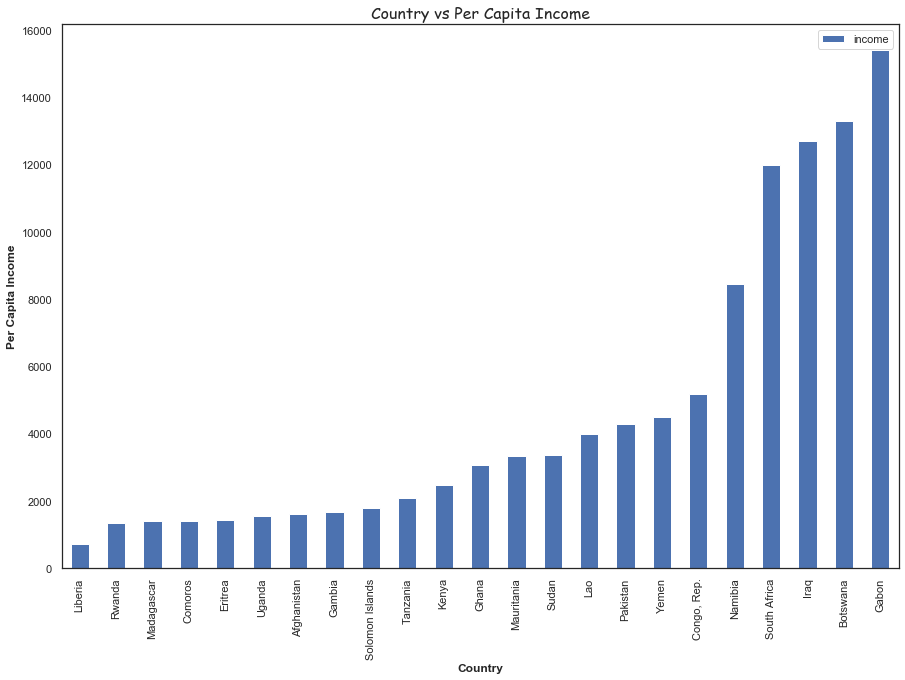

In [68]:
# BarPlot for Per Capita Income of countries which are in need of aid

country_income = pd.DataFrame(country_list.groupby(['country'])['income'].mean().sort_values(ascending = True))
country_income.plot.bar(figsize=(15,10),facecolor='b')
plt.title('Country vs Per Capita Income',fontsize=16,family = "Comic Sans MS")
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()




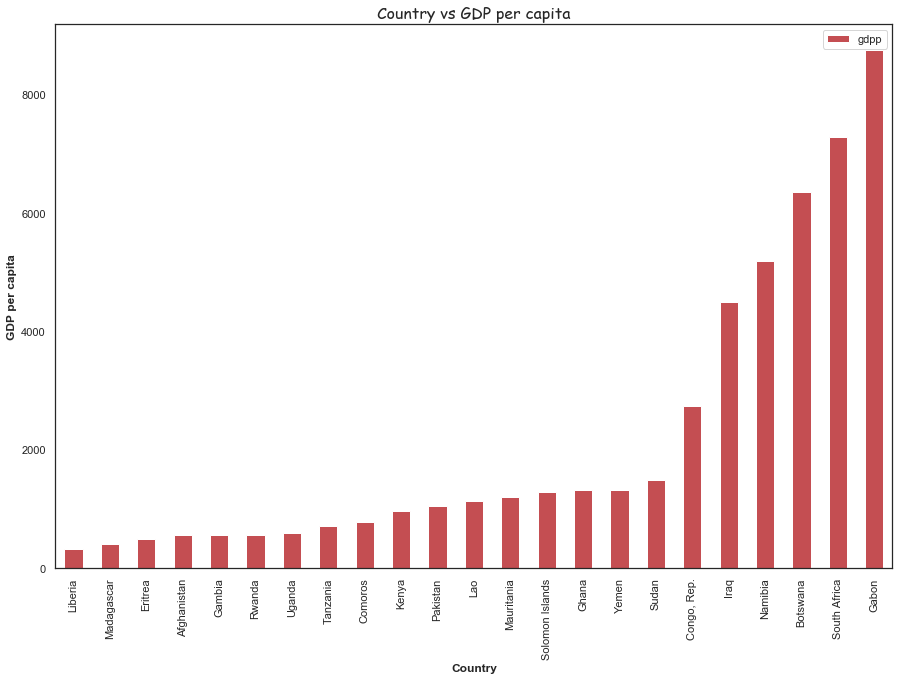

In [69]:
# BarPlot for Per Capita Income of countries which are in need of aid

country_gdp = pd.DataFrame(country_list.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
country_gdp.plot.bar(figsize=(15,10),facecolor='r')
plt.title('Country vs GDP per capita',fontsize=16,family = "Comic Sans MS")
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()


## Closing Statement

- We have used PCA above to reduce the variables involved and then done the clustering of countries based on those Principal components and then later we identified few factors like child mortality, income etc which plays a vital role in deciding the development status of the country and builded clusters of countries based on that. Based on those clusters we have identified the below list of countries which are in dire need of aid. The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.


In [70]:
# Final countries list
country_list.reset_index(drop=True).country

0         Afghanistan
1            Botswana
2             Comoros
3         Congo, Rep.
4             Eritrea
5               Gabon
6              Gambia
7               Ghana
8                Iraq
9               Kenya
10                Lao
11            Liberia
12         Madagascar
13         Mauritania
14            Namibia
15           Pakistan
16             Rwanda
17    Solomon Islands
18       South Africa
19              Sudan
20           Tanzania
21             Uganda
22              Yemen
Name: country, dtype: object